In [60]:
import pandas as pd
import numpy as np

In [61]:
train_data = pd.read_csv('~/Code/train_toxic_comment.csv')
test_data = pd.read_csv('~/Code/test_toxic_comment.csv')

In [62]:
all_comment_list = list(train_data['comment_text'])

In [63]:
all_words = []

In [64]:
for comment in all_comment_list:
    all_words.extend(comment.split(' '))

In [65]:
from collections import Counter

In [66]:
occurences_counter = Counter(all_words)

In [67]:
occurences_counter.most_common()

[('the', 267335),
 ('to', 173307),
 ('', 135015),
 ('of', 131942),
 ('and', 124039),
 ('a', 121406),
 ('I', 99455),
 ('is', 98841),
 ('you', 94183),
 ('that', 84784),
 ('in', 77899),
 ('for', 57870),
 ('it', 55477),
 ('on', 50736),
 ('not', 50728),
 ('be', 48660),
 ('this', 42684),
 ('have', 41688),
 ('as', 40848),
 ('are', 40091),
 ('with', 34142),
 ('your', 33178),
 ('was', 31659),
 ('or', 29119),
 ('but', 25350),
 ('an', 25164),
 ('from', 23439),
 ('by', 23180),
 ('my', 22812),
 ('at', 21995),
 ('article', 21933),
 ('"', 21335),
 ('about', 20939),
 ('do', 19016),
 ('The', 18729),
 ('if', 18537),
 ('can', 18334),
 ('has', 18107),
 ('will', 16736),
 ('would', 16711),
 ('page', 16339),
 ('like', 15577),
 ('me', 15342),
 ('what', 15335),
 ('been', 14891),
 ('so', 14881),
 ('all', 14087),
 ('just', 13900),
 ('any', 13885),
 ('they', 13824),
 ('which', 13687),
 ('one', 13577),
 ('should', 13463),
 ('-', 13408),
 ('no', 13235),
 ('more', 12802),
 ('If', 12695),
 ('other', 12449),
 ('there'

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
occurences_vec = [a[1] for a in occurences_counter.most_common()]

Text(0.5,1,'occurences histogram with logarithmic scale')

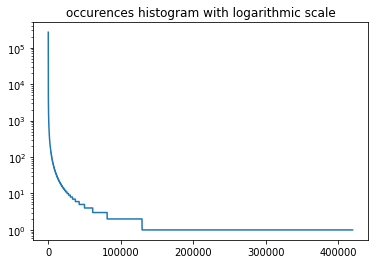

In [70]:
plt.semilogy(occurences_vec)
plt.title('occurences histogram with logarithmic scale')

In [71]:
X_train = train_data.comment_text
Y_train = train_data.drop(['id', 'comment_text'],1)
X_test = test_data.comment_text
class_list = list(Y_train.columns)

In [72]:
class_list

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [73]:
Y_train = Y_train.values

In [74]:
X_train = X_train.values

In [75]:
list(X_train)

["Nonsense?  kiss off, geek. what I said is true.  I'll have your account terminated.",
 '"\n\n Please do not vandalize pages, as you did with this edit to W. S. Merwin. If you continue to do so, you will be blocked from editing.    "',
 '"\n\n ""Points of interest"" \n\nI removed the ""points of interest"" section you added because it seemed kind of spammy. I know you probably didn\'t mean to disobey the rules, but generally, a point of interest tends to be rather touristy, and quite irrelevant to an area culture. That\'s just my opinion, though.\n\nIf you want to reply, just put your reply here and add {{talkback|Jamiegraham08}} on my talkpage.   "',
 "Asking some his nationality is a Racial offence. Wow wasn't aware of it.  Blocking me has shown your support towards your community. Thanku for that",
 'The reader here is not going by my say so for ethereal vocal style and dark lyrical content. The cited sources in the External Links are saying those things. If you feel the sources ar

In [76]:
X = list(X_train)
Y = Y_train

In [77]:
train_percent = .7
val_percent = .2
test_percent = .1
total_samples_num = len(Y)

In [78]:
train_last = int(total_samples_num * train_percent)
val_last = train_last + int(total_samples_num*val_percent)

In [79]:
train_X = X[:train_last]
val_X = X[train_last:val_last]
test_X = X[val_last:]
train_Y = Y[:train_last]
val_Y = Y[train_last:val_last]
test_Y = Y[val_last:]

In [80]:
from keras.preprocessing.text import Tokenizer

In [81]:
my_tokenizer = Tokenizer(num_words=10000)

In [82]:
my_tokenizer.fit_on_texts(train_X)

In [83]:
X_train_toke = my_tokenizer.texts_to_sequences(train_X)
X_val_toke = my_tokenizer.texts_to_sequences(val_X)
X_test_toke = my_tokenizer.texts_to_sequences(test_X)

In [84]:
X_train_toke

[[799, 4690, 212, 6731, 40, 7, 166, 8, 398, 235, 19, 20, 355],
 [44,
  33,
  14,
  681,
  115,
  17,
  6,
  87,
  21,
  13,
  71,
  2,
  911,
  372,
  22,
  6,
  284,
  2,
  33,
  38,
  6,
  45,
  16,
  172,
  32,
  122],
 [750,
  3,
  501,
  7,
  186,
  1,
  750,
  3,
  501,
  126,
  6,
  179,
  69,
  11,
  1693,
  449,
  3,
  7,
  68,
  6,
  312,
  240,
  281,
  2,
  1,
  373,
  26,
  704,
  5,
  149,
  3,
  501,
  5120,
  2,
  16,
  267,
  4,
  378,
  1124,
  2,
  30,
  745,
  933,
  203,
  51,
  29,
  324,
  242,
  22,
  6,
  109,
  2,
  663,
  51,
  202,
  20,
  663,
  64,
  4,
  147,
  4793,
  15,
  29,
  1997],
 [889,
  61,
  65,
  2474,
  8,
  5,
  2618,
  4015,
  1505,
  617,
  688,
  3,
  11,
  855,
  35,
  43,
  1168,
  20,
  361,
  1046,
  20,
  462,
  12,
  9],
 [1,
  1150,
  64,
  8,
  14,
  175,
  31,
  29,
  123,
  38,
  12,
  6038,
  278,
  4,
  2213,
  167,
  1,
  726,
  108,
  10,
  1,
  723,
  219,
  18,
  384,
  142,
  227,
  22,
  6,
  215,
  1,
  108,
  18,
  240

In [85]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

In [86]:
X_train_toke_padded = sequence.pad_sequences(X_train_toke, maxlen=20)
X_val_toke_padded = sequence.pad_sequences(X_val_toke, maxlen=20)
X_train_toke_padded = sequence.pad_sequences(X_train_toke, maxlen=20)

In [87]:
model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim = 128))
model.add(LSTM(128))
model.add(Dense(6))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [88]:
model.fit(X_train_toke_padded, train_Y)

Epoch 1/1
67095/67095 [==============================] - 121s 2ms/step - loss: 0.0848 - acc: 0.9748


In [89]:
#Example

In [90]:
example_list = ['I hate you', 'Your face is stupid','Take a shower you dirty slimebag', 'I love my mommy']
example_tokenizer = Tokenizer(num_words=15)
example_tokenizer.fit_on_texts(example_list)
example_toke = example_tokenizer.texts_to_sequences(example_list)
example_array = np.asarray(example_toke)
print(model.predict(example_array[0]))
print(model.predict(example_array[1]))
print(model.predict(example_array[2]))
print(model.predict(example_array[3]))

[[ 0.38922223  0.35546076  0.39262825  0.33226913  0.35719791  0.33967873]
 [ 0.4163135   0.40780038  0.41485035  0.39131159  0.39533964  0.39132285]
 [ 0.35304764  0.36023208  0.3673619   0.33704332  0.32221207  0.33033305]]
[[ 0.44337696  0.41970214  0.43540713  0.41930655  0.4249396   0.41350341]
 [ 0.48357198  0.45898017  0.46577585  0.45344201  0.47150561  0.46132365]
 [ 0.54603595  0.47146696  0.51900816  0.46303189  0.51496124  0.47132656]
 [ 0.49158207  0.43176499  0.46611285  0.42251918  0.4680351   0.43812716]]
[[ 0.43712404  0.4048011   0.43065163  0.39488     0.41466814  0.39559942]
 [ 0.37405032  0.35282728  0.37826645  0.33345878  0.33605334  0.33214462]
 [ 0.3619079   0.36676466  0.38245726  0.343281    0.33616102  0.34238878]
 [ 0.35304764  0.36023208  0.3673619   0.33704332  0.3222121   0.33033305]
 [ 0.39888623  0.37898332  0.40114209  0.3617011   0.37076202  0.36499432]
 [ 0.3811565   0.34206983  0.37817457  0.31550905  0.34191588  0.32020852]]
[[ 0.38922223  0.35546

In [91]:
example_list

['I hate you',
 'Your face is stupid',
 'Take a shower you dirty slimebag',
 'I love my mommy']

In [92]:
example_toke

[[1, 3, 2], [4, 5, 6, 7], [8, 9, 10, 2, 11, 12], [1, 13, 14]]